In [1]:
%matplotlib inline

# Detecting Parkinsons
# Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

In [2]:
import pandas as pd

df = pd.read_csv('parkinsons.data')
print(df.shape)
df.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


"status" is the label/target column. We move it to the end of the dataframe for ease.

In [3]:
df = df[[c for c in df if c not in ['status']] + ['status']]
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# Preprocessing

We first check if any examples contain null values.

In [4]:
df.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
status              False
dtype: bool

In [5]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

The number of examples with status 0 is significantly smaller than those with 1. This may be a problem the models have to face, but it is definitely going to affect the accuracy for predicting status 0, due to the smaller example size.

## Feature extraction

We know the column 'name' is not particularly useful in identifying patients status, so we remove it.

In [6]:
df = df.drop('name', 1)

We plot each example in separate graphs to compare the distributions of examples with status 0 and 1. We will use these to observe which features have reminicent distributions. Since the dataset is simple, features with similar distribution on both classes won't really help distinguishing them.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def dens(feature, df):
    sns.displot(data=df, x=feature, hue="status", kind="kde",rug=True)
    plt.show()

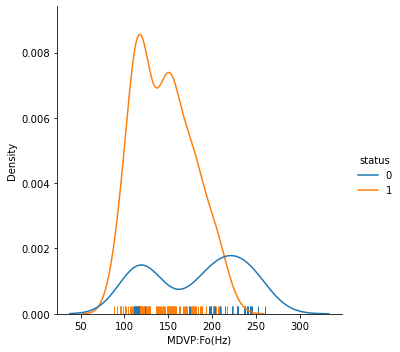

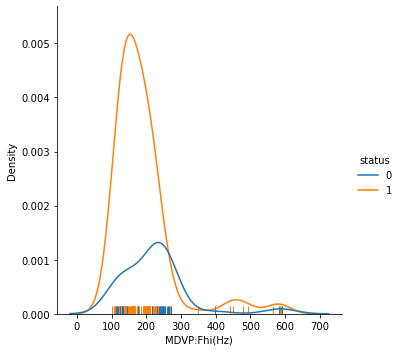

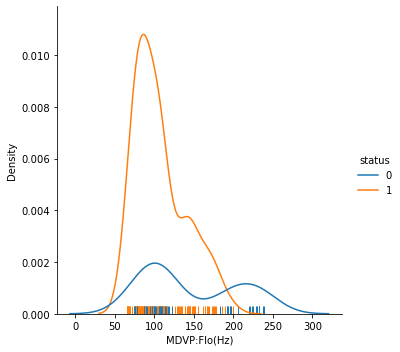

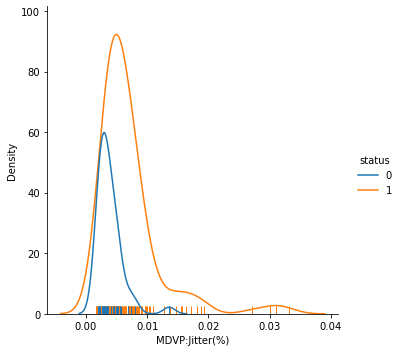

C:\Users\arekk\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\arekk\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


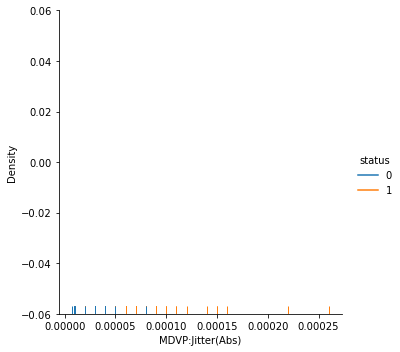

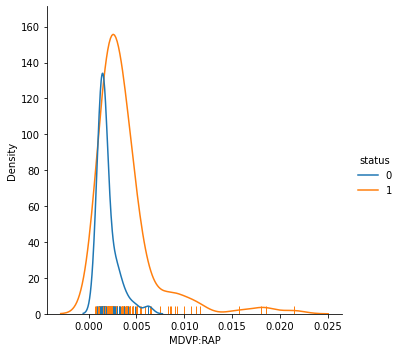

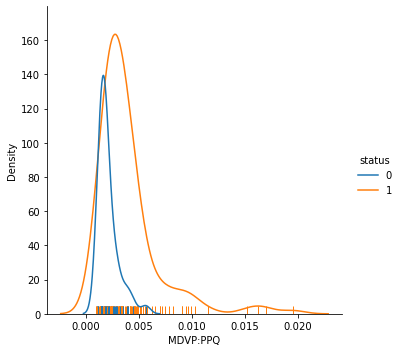

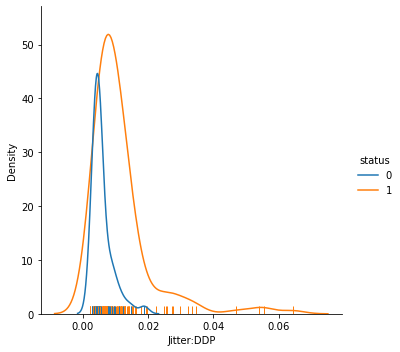

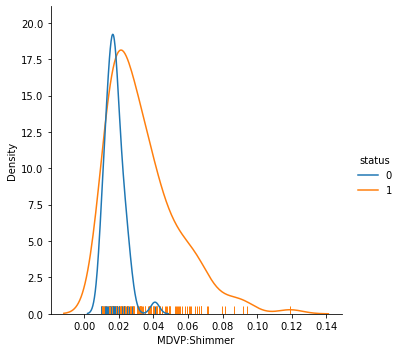

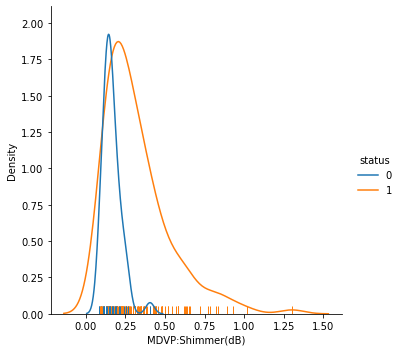

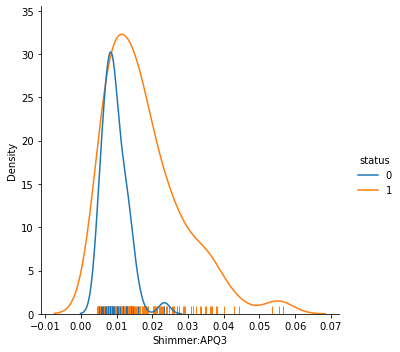

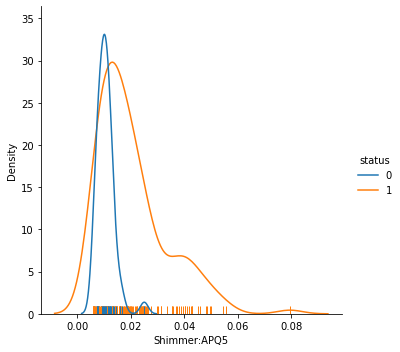

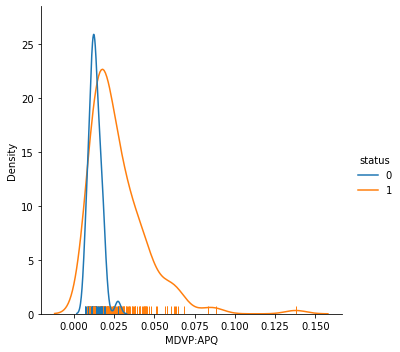

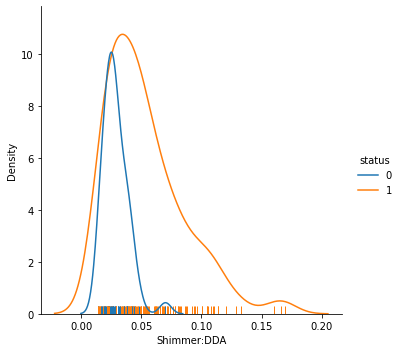

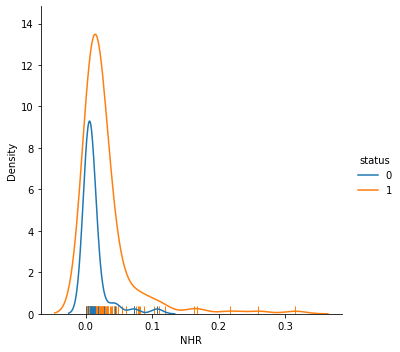

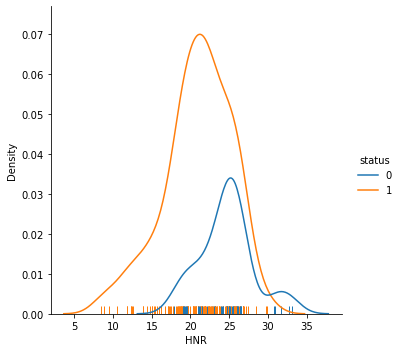

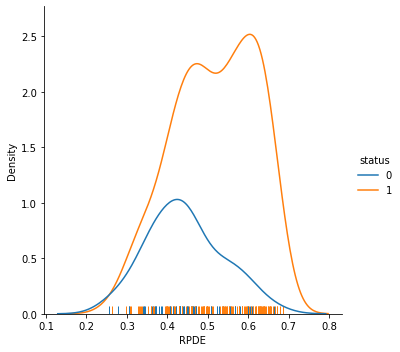

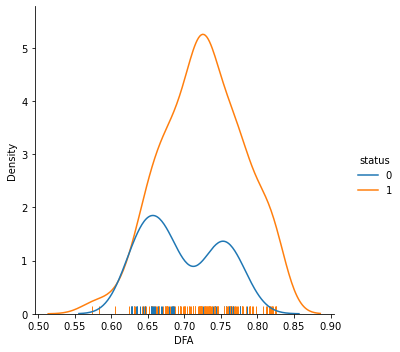

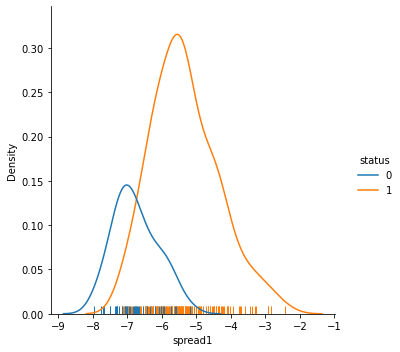

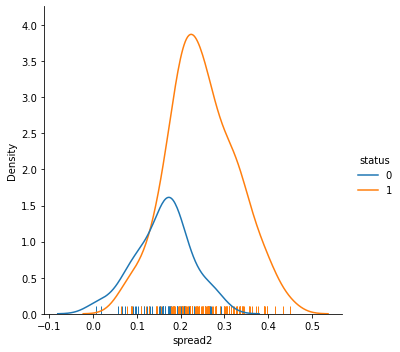

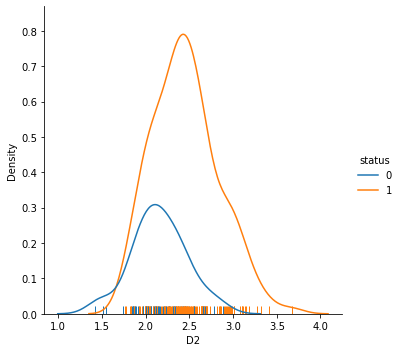

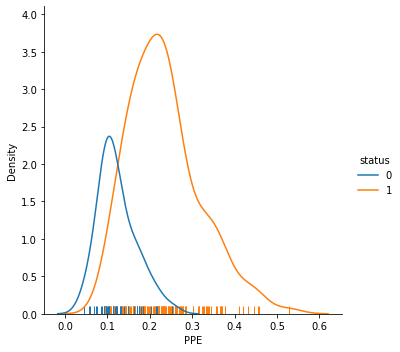

In [9]:
for feat in df.columns[:-1]:
    dens(feat, df)

We observe that the distributions of examples with status 0 in 'MDVP:Fhi(Hz)', 'NHR' and 'HNR' look like a subset of all patients overall, making these features difficult for any model to get anything useful ('MDVP:Jitter(Abs)' is also included because it shows 0 variance). Therefore, we remove them.

In [10]:
df = df.drop(['MDVP:Fhi(Hz)', 'MDVP:Jitter(Abs)', 'NHR', 'HNR'], 1)

In [11]:
X = df.drop('status', 1)
y = df['status']

We are now down to 18 features.

## Normalization
We use MinMaxScaler to transform our features between -1 and 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1, 1))
X_scaled = scaler.fit_transform(X)

## Split into train and set
We split our dataset into 80% training and 20% testing.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(y_train.shape)

(156, 18)
(156,)


## Models

We train models with different machine learning algorithms provided by scikit learn. Scikit learn also provides a classification report function to evaluate each model separately. We will finally compile the accuracy of all models to compare.

In [14]:
from sklearn.metrics import classification_report

### Logistic Regression (LR)

In [15]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
print(classification_report(y_test, model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



### k-Nearest Neighbors (KNN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

model_2 = BaggingClassifier(KNeighborsClassifier())
model_2.fit(X_train, y_train)
print(classification_report(y_test, model_2.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



### Support Vector Machines (SVM)

In [17]:
from sklearn import svm

model_3 = svm.SVC()
model_3.fit(X_train, y_train)
print(classification_report(y_test, model_3.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



### Decision Tree Classifier (DT)

In [18]:
from sklearn.tree import DecisionTreeClassifier

model_4 = DecisionTreeClassifier()
model_4.fit(X_train, y_train)
print(classification_report(y_test, model_4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



### Random Forest (RF)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_5 = RandomForestClassifier()
model_5.fit(X_train, y_train)
print(classification_report(y_test, model_5.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



### Gaussian Naive Bayes (GaussianNB)

In [20]:
from sklearn.naive_bayes import GaussianNB

model_6 = GaussianNB()
model_6.fit(X_train, y_train)
print(classification_report(y_test, model_6.predict(X_test)))

              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.90      0.81      0.85        32

    accuracy                           0.77        39
   macro avg       0.65      0.69      0.66        39
weighted avg       0.81      0.77      0.78        39



In [25]:
from sklearn.metrics import f1_score

models = [('LR', model_1), ('KNN', model_2), 
          ('SVM', model_3), ('DT', model_4),
          ('RF', model_5), ('GaussianNB', model_6)]

scores = []

for name, model in models:
    score = f1_score(model.predict(X_test), y_test)*100
    score_str = "{:.4}%".format(score)
    scores += [[name, score_str]]

results = pd.DataFrame(scores, columns=['Name', 'Accuracy'])

results

,Name,Accuracy
0,LR,94.12%
1,KNN,96.97%
2,SVM,94.12%
3,DT,95.38%
4,RF,95.38%
5,GaussianNB,85.25%


On just the second try, we trained a model using KNN with 96.97% accuracy, beating the other models by a margin.